In [1]:
%matplotlib inline

import numpy as np
import math
from datetime import timedelta
from operator import attrgetter
import xarray as xr
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


In [2]:
import parcels
parcels.__version__ # para saber la versión del paquete parcels que estamos usando

'3.1.0'

In [5]:
filedir = '/home/jovyan/shared/ohwe24_hackaton/proy2/'

In [4]:
!ls /home/jovyan/shared/ohwe24_hackaton/proy2

cmems_mod_glo_bgc_my_0.083deg-lmtl-Fphy_PT1D-I_19980101.nc
mercatorbiomer4v2r1_global_mean_bio_20220101.nc
mercatorbiomer4v2r1_global_mean_bio_20220102.nc
mercatorbiomer4v2r1_global_mean_bio_20220103.nc


In [7]:
ds_m = xr.open_dataset(filedir + "cmems_mod_glo_bgc_my_0.083deg-lmtl-Fphy_PT1D-I_19980101.nc")

In [8]:
ds_m

<xarray.Dataset> Size: 846MB
Dimensions:              (latitude: 2040, longitude: 4320, time: 1, depth: 3)
Coordinates:
  * latitude             (latitude) float32 8kB -80.0 -79.92 ... 89.83 89.92
  * longitude            (longitude) float32 17kB -180.0 -179.9 ... 179.8 179.9
  * time                 (time) datetime64[ns] 8B 1998-01-01T12:00:00
  * depth                (depth) int32 12B 1 2 3
Data variables:
    T                    (time, depth, latitude, longitude) float64 212MB ...
    U                    (time, depth, latitude, longitude) float64 212MB ...
    V                    (time, depth, latitude, longitude) float64 212MB ...
    pelagic_layer_depth  (time, depth, latitude, longitude) float64 212MB ...
Attributes:
    title:                      Physical forcings of global ocean low and mid...
    source:                     SEAPODYM-LMTL 3.0.0
    references:                 http://www.cls.fr; http://www.seapodym.eu
    institution:                CLS
    Conventions:                CF-1.7
    source_physical_variables:  GLOBAL_REANALYSIS_PHY_001_030 CMEMS product
    spatial_resolution:         0.083x0.083
    temporal_resolution:        1 day
    domain:                     global
    date_field:                 19980101
    history:                    Created on 2022-09-28

In [ ]:
ds_m.ugos[0,:,:].plot()

In [9]:
xr.__version__

'2024.9.0'

In [10]:
lon_min = -76
lon_max = -72
lat_min = -41
lat_max = -31

In [11]:
ds_m_sub = ds_m.where((ds_m.longitude<lon_max)&(ds_m.longitude>lon_min)&(ds_m.latitude<lat_max)&(ds_m.latitude>lat_min), drop=True)


In [12]:
ds_m_sub.U

<xarray.DataArray 'U' (time: 1, depth: 3, latitude: 119, longitude: 47)> Size: 134kB
array([[[[ 0.05704753,  0.05256189,  0.046117  , ...,         nan,
                  nan,         nan],
         [ 0.05581011,  0.05297436,  0.04719974, ...,         nan,
                  nan,         nan],
         [ 0.0449827 ,  0.04281721,  0.03900184, ...,         nan,
                  nan,         nan],
         ...,
         [ 0.12345567,  0.12500244,  0.12314632, ..., -0.14867334,
          -0.16156312, -0.15444796],
         [ 0.12201202,  0.12000121,  0.11721702, ..., -0.11423185,
          -0.12799814, -0.13011206],
         [ 0.09463413,  0.09422165,  0.09375762, ..., -0.0836573 ,
          -0.09902191, -0.1091275 ]],

        [[ 0.04420931,  0.04199227,  0.04147668, ...,         nan,
                  nan,         nan],
         [ 0.03508335,  0.03822845,  0.04312657, ...,         nan,
                  nan,         nan],
         [ 0.02714324,  0.03683636,  0.04503426, ...,         nan,
                  nan,         nan],
...
         [ 0.05338683,  0.05874898,  0.05978016, ..., -0.0927317 ,
          -0.10938529, -0.08618369],
         [ 0.07803209,  0.08102252,  0.07916639, ..., -0.05065946,
          -0.06916918, -0.06427107],
         [ 0.09855262,  0.09917133,  0.09937756, ..., -0.01941464,
          -0.03735721, -0.04287404]],

        [[ 0.03183512,  0.02925717,  0.02817443, ...,         nan,
                  nan,         nan],
         [ 0.01915158,  0.01817196,  0.020389  , ...,         nan,
                  nan,         nan],
         [ 0.00528218,  0.00827261,  0.01461438, ...,         nan,
                  nan,         nan],
         ...,
         [ 0.0263183 ,  0.02941184,  0.03214448, ..., -0.01085583,
          -0.01802254,  0.00476659],
         [ 0.03611453,  0.03822845,  0.03781598, ...,  0.01363475,
           0.00935535,  0.01554244],
         [ 0.0472513 ,  0.04683883,  0.04756065, ...,  0.0263183 ,
           0.0181204 ,  0.01626427]]]])
Coordinates:
  * latitude   (latitude) float32 476B -40.92 -40.83 -40.75 ... -31.17 -31.08
  * longitude  (longitude) float32 188B -75.92 -75.83 -75.75 ... -72.17 -72.08
  * time       (time) datetime64[ns] 8B 1998-01-01T12:00:00
  * depth      (depth) int32 12B 1 2 3
Attributes:
    standard_name:  eastward_sea_water_velocity_vertical_mean_over_pelagic_layer
    units:          m/s

In [14]:
ds_m_sub['U']

<xarray.DataArray 'U' (time: 1, depth: 3, latitude: 119, longitude: 47)> Size: 134kB
array([[[[ 0.05704753,  0.05256189,  0.046117  , ...,         nan,
                  nan,         nan],
         [ 0.05581011,  0.05297436,  0.04719974, ...,         nan,
                  nan,         nan],
         [ 0.0449827 ,  0.04281721,  0.03900184, ...,         nan,
                  nan,         nan],
         ...,
         [ 0.12345567,  0.12500244,  0.12314632, ..., -0.14867334,
          -0.16156312, -0.15444796],
         [ 0.12201202,  0.12000121,  0.11721702, ..., -0.11423185,
          -0.12799814, -0.13011206],
         [ 0.09463413,  0.09422165,  0.09375762, ..., -0.0836573 ,
          -0.09902191, -0.1091275 ]],

        [[ 0.04420931,  0.04199227,  0.04147668, ...,         nan,
                  nan,         nan],
         [ 0.03508335,  0.03822845,  0.04312657, ...,         nan,
                  nan,         nan],
         [ 0.02714324,  0.03683636,  0.04503426, ...,         nan,
                  nan,         nan],
...
         [ 0.05338683,  0.05874898,  0.05978016, ..., -0.0927317 ,
          -0.10938529, -0.08618369],
         [ 0.07803209,  0.08102252,  0.07916639, ..., -0.05065946,
          -0.06916918, -0.06427107],
         [ 0.09855262,  0.09917133,  0.09937756, ..., -0.01941464,
          -0.03735721, -0.04287404]],

        [[ 0.03183512,  0.02925717,  0.02817443, ...,         nan,
                  nan,         nan],
         [ 0.01915158,  0.01817196,  0.020389  , ...,         nan,
                  nan,         nan],
         [ 0.00528218,  0.00827261,  0.01461438, ...,         nan,
                  nan,         nan],
         ...,
         [ 0.0263183 ,  0.02941184,  0.03214448, ..., -0.01085583,
          -0.01802254,  0.00476659],
         [ 0.03611453,  0.03822845,  0.03781598, ...,  0.01363475,
           0.00935535,  0.01554244],
         [ 0.0472513 ,  0.04683883,  0.04756065, ...,  0.0263183 ,
           0.0181204 ,  0.01626427]]]])
Coordinates:
  * latitude   (latitude) float32 476B -40.92 -40.83 -40.75 ... -31.17 -31.08
  * longitude  (longitude) float32 188B -75.92 -75.83 -75.75 ... -72.17 -72.08
  * time       (time) datetime64[ns] 8B 1998-01-01T12:00:00
  * depth      (depth) int32 12B 1 2 3
Attributes:
    standard_name:  eastward_sea_water_velocity_vertical_mean_over_pelagic_layer
    units:          m/s

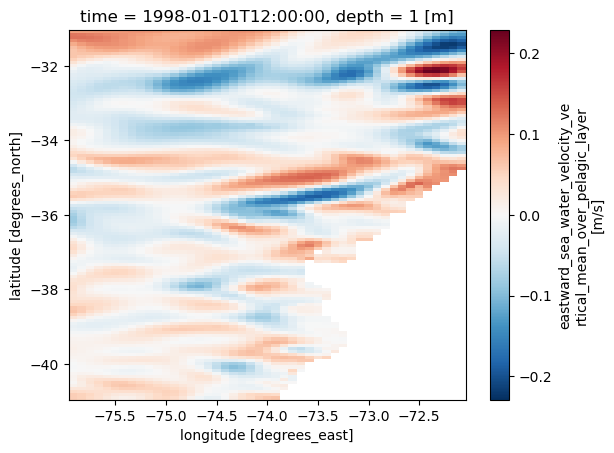

In [13]:
ds_m_sub.U[0,0,:,:].plot()

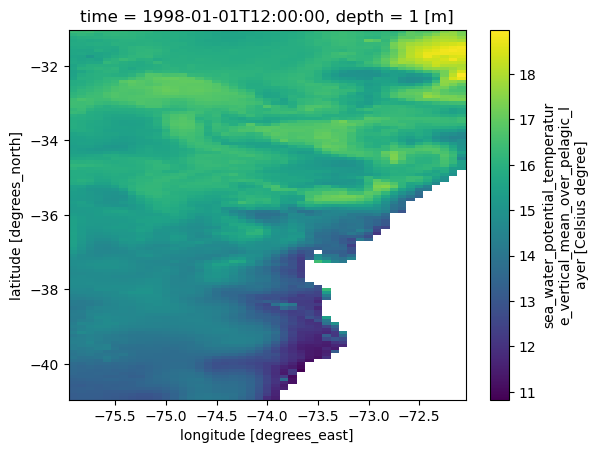

In [15]:
ds_m_sub.T[0,0,:,:].plot()

(array([ 793., 2133.,  677., 1828., 2759.,  757., 1209., 2150.,  730.,
          81.]),
 array([ 5.3182116 ,  6.68276165,  8.0473117 ,  9.41186175, 10.7764118 ,
        12.14096185, 13.50551191, 14.87006196, 16.23461201, 17.59916206,
        18.96371211]),
 <BarContainer object of 10 artists>)

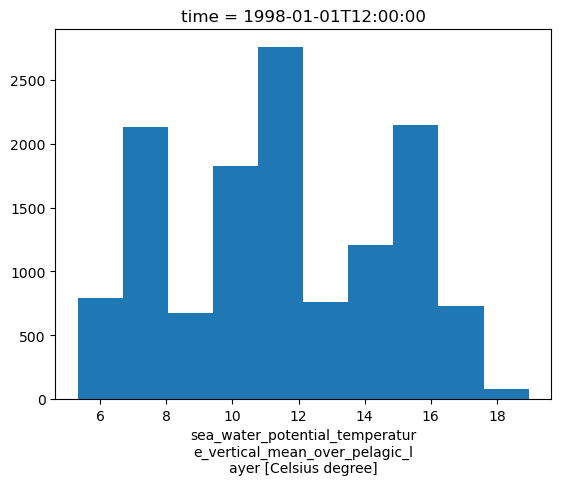

In [16]:
ds_m_sub.T.plot()

In [ ]:
"dt_global_allsat_phy_l4_201809[0-1]?_*.nc" # expresiones regulares

In [ ]:
filedir = '/home/jovyan/shared/ohwe24_hackaton/proy2/'


In [21]:
!ls /home/jovyan/shared/ohwe24_hackaton/proy2/mercatorbiomer4v2r1_global_mean_bio_2022010*.nc

/home/jovyan/shared/ohwe24_hackaton/proy2/mercatorbiomer4v2r1_global_mean_bio_20220101.nc
/home/jovyan/shared/ohwe24_hackaton/proy2/mercatorbiomer4v2r1_global_mean_bio_20220102.nc
/home/jovyan/shared/ohwe24_hackaton/proy2/mercatorbiomer4v2r1_global_mean_bio_20220103.nc


In [22]:
ds_m

<xarray.Dataset> Size: 846MB
Dimensions:              (latitude: 2040, longitude: 4320, time: 1, depth: 3)
Coordinates:
  * latitude             (latitude) float32 8kB -80.0 -79.92 ... 89.83 89.92
  * longitude            (longitude) float32 17kB -180.0 -179.9 ... 179.8 179.9
  * time                 (time) datetime64[ns] 8B 1998-01-01T12:00:00
  * depth                (depth) int32 12B 1 2 3
Data variables:
    T                    (time, depth, latitude, longitude) float64 212MB ...
    U                    (time, depth, latitude, longitude) float64 212MB ...
    V                    (time, depth, latitude, longitude) float64 212MB ...
    pelagic_layer_depth  (time, depth, latitude, longitude) float64 212MB ...
Attributes:
    title:                      Physical forcings of global ocean low and mid...
    source:                     SEAPODYM-LMTL 3.0.0
    references:                 http://www.cls.fr; http://www.seapodym.eu
    institution:                CLS
    Conventions:                CF-1.7
    source_physical_variables:  GLOBAL_REANALYSIS_PHY_001_030 CMEMS product
    spatial_resolution:         0.083x0.083
    temporal_resolution:        1 day
    domain:                     global
    date_field:                 19980101
    history:                    Created on 2022-09-28